In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

from src.data_prep.Nifty50Dataset import Nifty50Dataset
from src.forecasting.GaussianTransformer import CustomTransformer
from src.forecasting.StockSeriesForcaster import StockSeriesForecaster

model = CustomTransformer(d_model=4, nhead=2, num_decoder_layers=5, num_encoder_layers=5, dim_feedforward=256)

dataset = Nifty50Dataset(
    "/Users/maniksomayaji/Documents/omscs/capstone_project/data/NIFTY 50_minute_data.csv",
    window_size=60,
    prediction_horizon=1
)

val_ratio = 0.2
val_size = int(len(dataset) * val_ratio)
train_size = len(dataset) - val_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

forecaster = StockSeriesForecaster(model, optimizer, criterion)


[Epoch 1 | Batch 50] Loss: 0.8421
[Epoch 1 | Batch 100] Loss: 1.8992
[Epoch 1 | Batch 150] Loss: 5.3163
[Epoch 1 | Batch 200] Loss: 0.6139
[Epoch 1 | Batch 250] Loss: 0.6540
[Epoch 1 | Batch 300] Loss: 0.7816
[Epoch 1 | Batch 350] Loss: 1.1512
[Epoch 1 | Batch 400] Loss: 1.6477
[Epoch 1 | Batch 450] Loss: 0.0822
[Epoch 1 | Batch 500] Loss: 3.1107
[Epoch 1 | Batch 550] Loss: 0.9539
[Epoch 1 | Batch 600] Loss: 0.5566
[Epoch 1 | Batch 650] Loss: 0.2147
[Epoch 1 | Batch 700] Loss: 0.6204
[Epoch 1 | Batch 750] Loss: 0.2241
[Epoch 1 | Batch 800] Loss: 0.7357
[Epoch 1 | Batch 850] Loss: 1.3698
[Epoch 1 | Batch 900] Loss: 1.3155
[Epoch 1 | Batch 950] Loss: 0.3616
[Epoch 1 | Batch 1000] Loss: 0.1259
[Epoch 1 | Batch 1050] Loss: 0.0029
[Epoch 1 | Batch 1100] Loss: 0.2461
[Epoch 1 | Batch 1150] Loss: 0.2082
[Epoch 1 | Batch 1200] Loss: 0.8364
[Epoch 1 | Batch 1250] Loss: 0.0291
[Epoch 1 | Batch 1300] Loss: 0.4149
[Epoch 1 | Batch 1350] Loss: 21.7062
[Epoch 1 | Batch 1400] Loss: 0.4740
[Epoch 1 | 

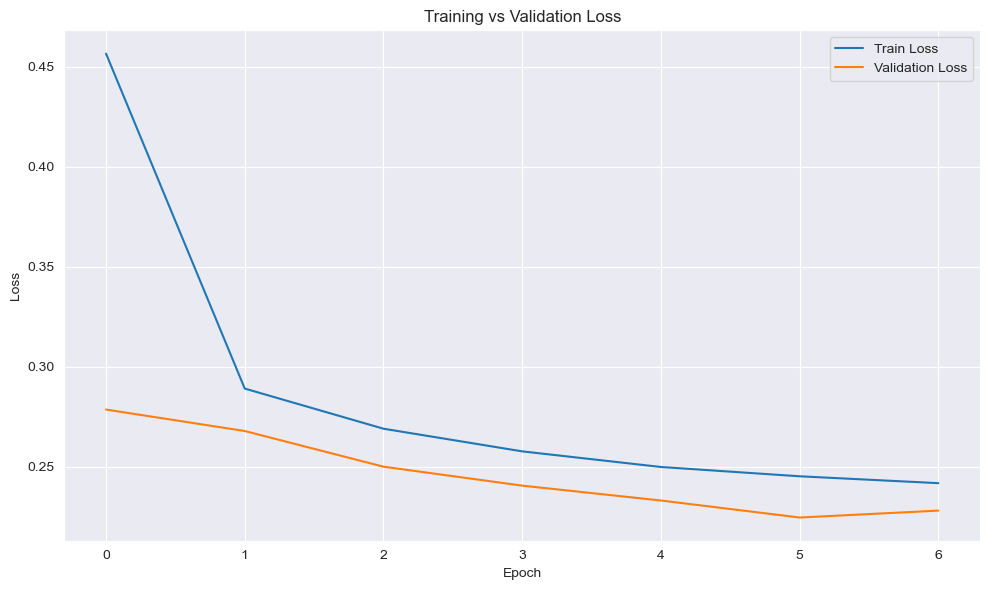

In [2]:
train_loss, val_loss = forecaster.train(train_loader, val_loader, epochs=7)

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
num_batches = 3
for i, (x, y) in enumerate(train_loader):
    if i >= num_batches:
        break
    output = forecaster.autoregressive_predict(x, max_len=20)
    print("Generated:", output)

Generated: tensor([[11557.2686, 11547.0244, 11539.7119, 11536.6074, 11536.8682, 11537.8174,
         11538.4434, 11538.7744, 11538.9219, 11538.9678, 11538.9502, 11538.8984,
         11538.8301, 11538.7549, 11538.6797, 11538.6074, 11538.5430, 11538.4873,
         11538.4365, 11538.3955],
        [13257.3398, 13216.1836, 13218.9102, 13240.7949, 13250.6074, 13238.2920,
         13217.7090, 13215.8604, 13218.8242, 13219.6445, 13222.9775, 13230.8867,
         13235.6611, 13239.0586, 13244.6240, 13253.7256, 13256.7803, 13253.4854,
         13248.2676, 13231.4434]])
Generated: tensor([[10827.2832, 10820.0195, 10814.2500, 10813.6279, 10813.1045, 10811.2695,
         10807.2861, 10803.7793, 10804.4346, 10806.1387, 10808.7764, 10812.8564,
         10816.7725, 10817.5811, 10820.4795, 10825.1680, 10825.4414, 10824.1641,
         10823.0078, 10821.9004],
        [15014.2051, 14935.2207, 14902.0098, 14859.0273, 14827.3594, 14814.9678,
         14815.8623, 14833.4141, 14858.9102, 14877.4150, 14888.75

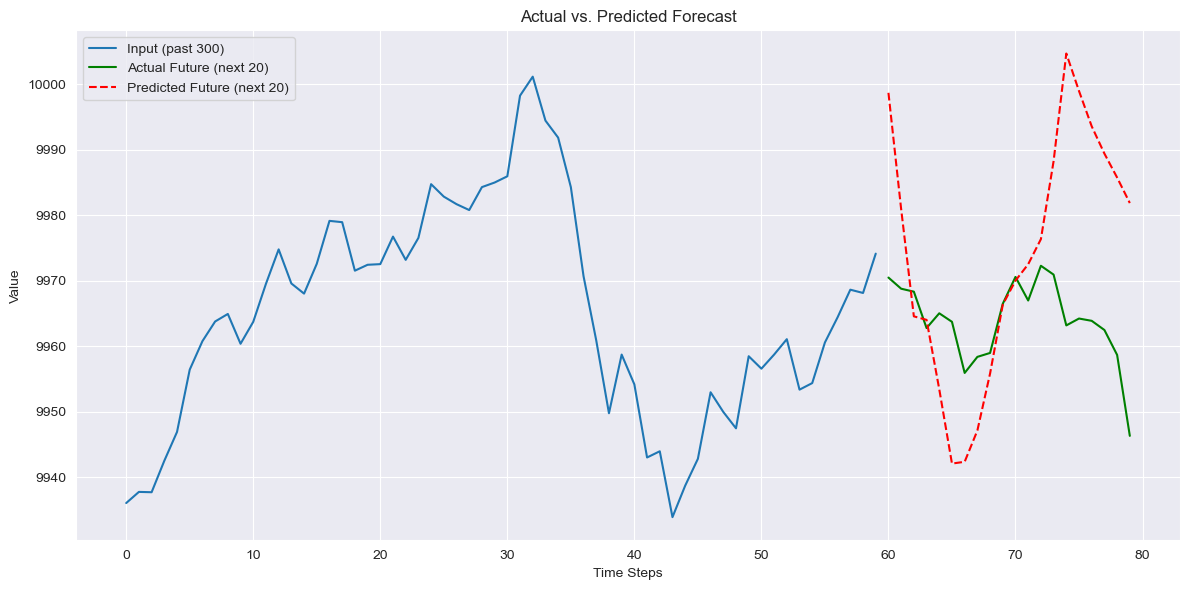

In [23]:
import matplotlib.pyplot as plt
import torch

predict_dataset = Nifty50Dataset(
    "/Users/maniksomayaji/Documents/omscs/capstone_project/data/NIFTY 50_minute_data.csv",
    window_size=80,
    prediction_horizon=1
)

data_x, data_y = predict_dataset[1000]

input_seq = data_x[:60].unsqueeze(0)
true_future = data_x[60:]

with torch.no_grad():
    predicted_future = forecaster.autoregressive_predict(input_seq, max_len=20)
predicted_future = predicted_future.squeeze().unsqueeze(-1) # Remove batch dimension

plt.figure(figsize=(12, 6))
plt.plot(range(60), input_seq.squeeze(), label='Input (past 300)')
plt.plot(range(60, 80), true_future, label='Actual Future (next 20)', color='green')
plt.plot(range(60, 80), predicted_future, label='Predicted Future (next 20)', color='red', linestyle='--')
plt.legend()
plt.title('Actual vs. Predicted Forecast')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
torch.save(model.state_dict(), 'models_results/checkpoints/model_guassian_ed_manik.pt')